# Car Price Prediction

Dataset source: https://archive.ics.uci.edu/ml/datasets/Automobile

In [205]:
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
df=pd.read_csv('https://drive.google.com/uc?id=1UOUron79AUpb8HR7OF7cGATmJeAygrH-')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. This process is called **symboling**. A value of  +3  indicates that the auto is risky,  −3  that it is probably pretty safe.

In [ ]:
df['CarName'].head(25)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object

In [ ]:
cars_name= pd.Series([i.split()[0] for i in df['CarName']])
cars_name

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Length: 205, dtype: object

In [ ]:
df['CarCompany']=cars_name
df.drop(columns= ['car_ID','CarName'],inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
df['CarCompany'].value_counts()

CarCompany
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
porcshce        1
Nissan          1
toyouta         1
vokswagen       1
Name: count, dtype: int64

In [ ]:
df.loc[(df['CarCompany'] == "vw") | (df['CarCompany'] == "vokswagen"), 'CarCompany'] = 'volkswagen'

# porsche
df.loc[(df['CarCompany']=='porcshce'),'CarCompany'] = "porsche"
# toyota
df.loc[(df['CarCompany']=='toyouta'),'CarCompany'] = "toyota"
# nissan
df.loc[(df['CarCompany']=='Nissan'),'CarCompany'] = "nissan"
# mazda
df.loc[(df['CarCompany']=='maxda'),'CarCompany'] = "mazda"

df['CarCompany'].value_counts()

CarCompany
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: count, dtype: int64

In [ ]:
df.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CarCompany           object
dtype: object

In [ ]:
num_df= df.select_dtypes(include=['int','float'])
num_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: >

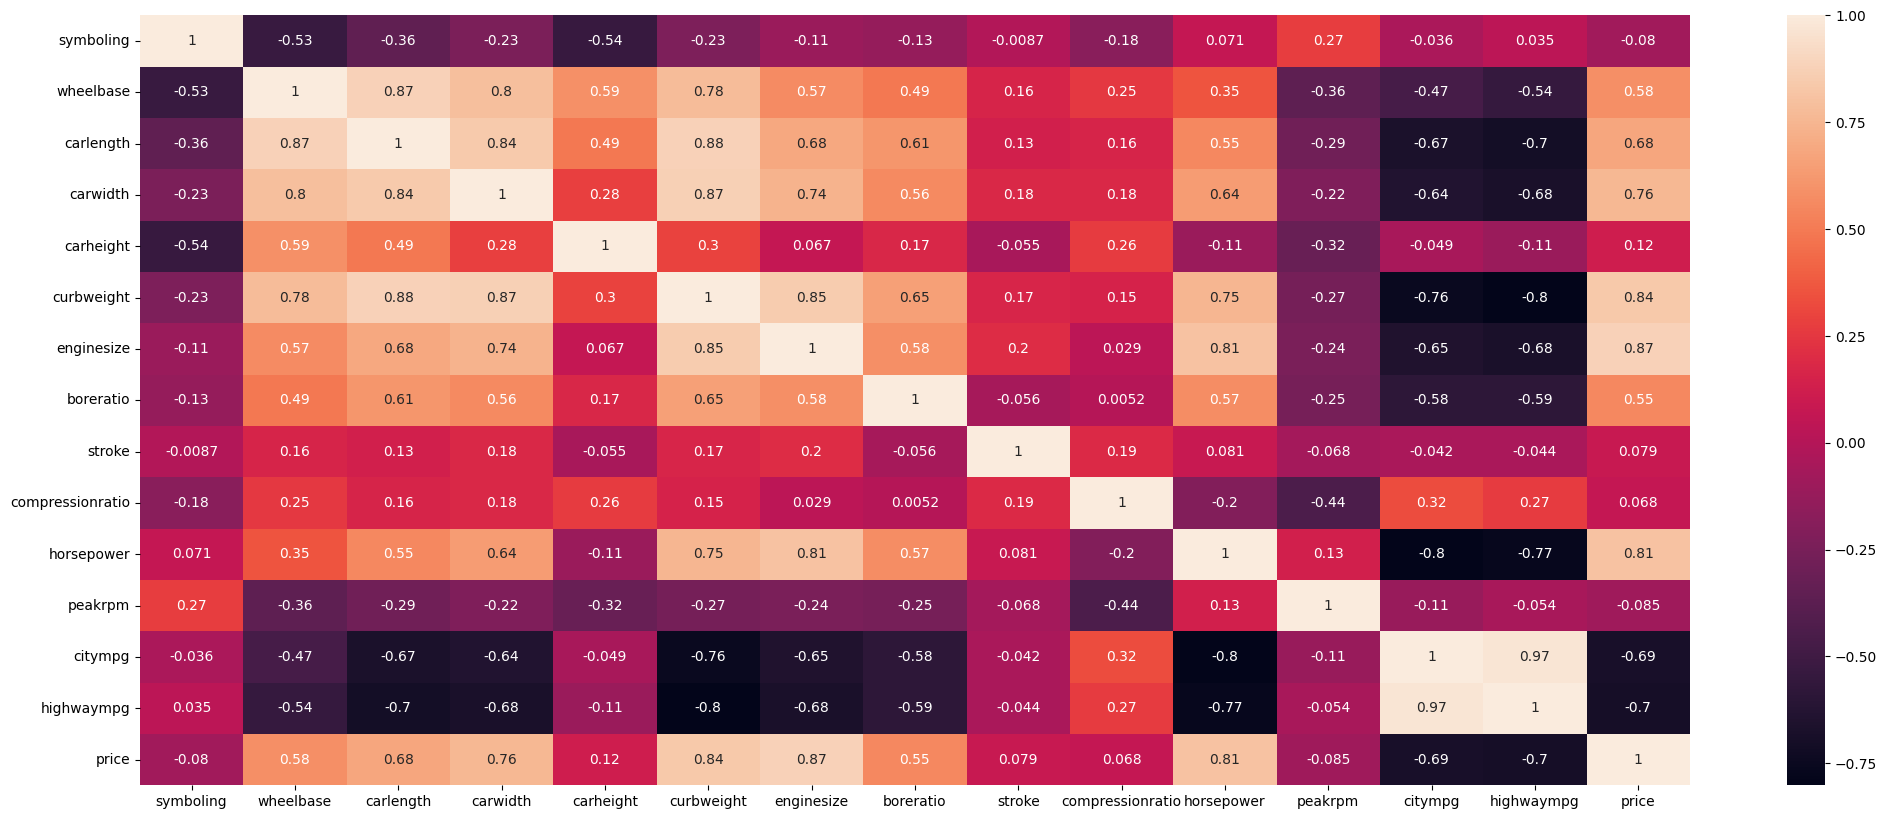

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(num_df.corr(),annot=True)

In [ ]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [ ]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [ ]:
dict_words= {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
df['doornumber']= df['doornumber'].map(dict_words)
df['cylindernumber']=df['cylindernumber'].map(dict_words)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
obj_df= df.select_dtypes(include='object')
obj_df

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarCompany
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo


In [ ]:
# One hot encoding
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
pd.get_dummies(df['carbody'],dtype=int)

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [ ]:
pd.get_dummies(df[['carbody','fueltype','aspiration']],dtype=int,drop_first=True)

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,fueltype_gas,aspiration_turbo
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,1,0,0,1,0
3,0,0,1,0,1,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
200,0,0,1,0,1,0
201,0,0,1,0,1,1
202,0,0,1,0,1,0
203,0,0,1,0,0,1


In [ ]:
dummy_df= pd.get_dummies(obj_df,dtype=int,drop_first=True)
dummy_df

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(columns=obj_df.columns,inplace=True)
df_new= pd.concat([df,dummy_df],axis=1)
df_new

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,0,0,1
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,0,0,1
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,0,0,0,0,0,0,0,0,1
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,0,0,0,0,1


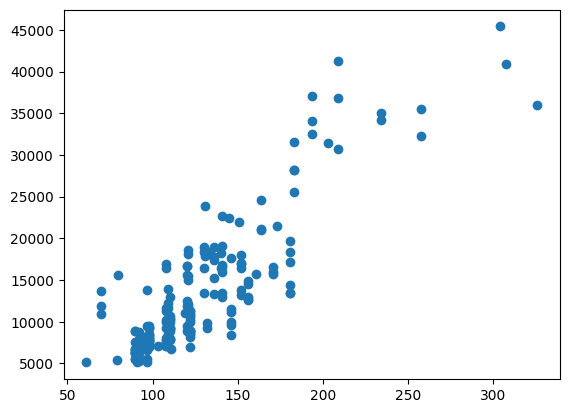

In [ ]:
plt.scatter(df['enginesize'],df['price'])

<Axes: xlabel='enginesize', ylabel='price'>

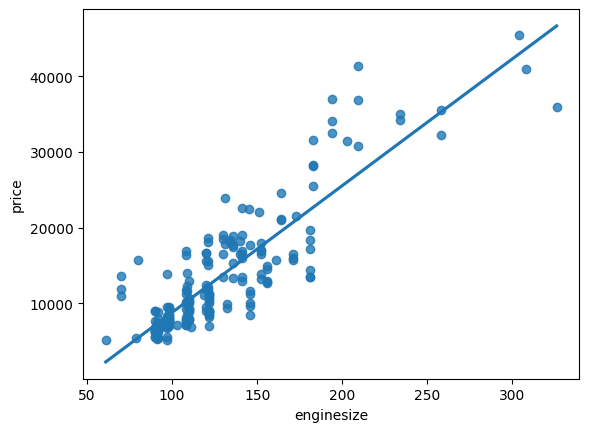

In [ ]:
sns.regplot(x=df['enginesize'],y=df['price'],ci=None)

In [ ]:
a1= np.array([1,2,3,4,5])
a2=np.array([10,11,12,13,14])

aa1,aa2,aa11,aa22=train_test_split(a1,a2,test_size=0.2,random_state=42)
aa1

array([5, 3, 1, 4])

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(df['enginesize'],df['price'],test_size=0.33,random_state=42)

In [ ]:
def errors_product():
  prod = (X_train - X_train.mean()) * (y_train - y_train.mean())
  return prod

def squared_errors():
  sq_errors = (X_train - X_train.mean()) ** 2
  return sq_errors

slope = errors_product().sum()/ squared_errors().sum()
intercept = y_train.mean() - slope * X_train.mean()

print(f"Slope: {slope} \nIntercept: {intercept}")

Slope: 165.32203370071696 
Intercept: -7590.257181325589


In [ ]:
X_train_reshaped=X_train.values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X_train_reshaped,y_train)
lr.intercept_, lr.coef_

(np.float64(-7590.257181325582), array([165.3220337]))

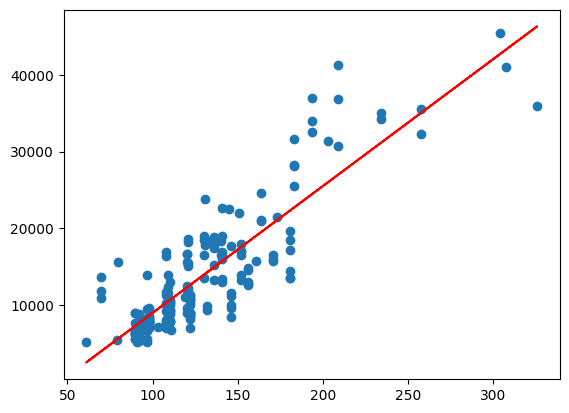

In [ ]:
plt.scatter(df['enginesize'],df['price'])
plt.plot(df['enginesize'],slope*df['enginesize']+intercept,color='red')

In [ ]:
def r_square(x,y):
  y_pred = slope * x + intercept
  sse = ((y - y_pred) **2).sum()
  sst = ((y - y.mean()) **2).sum()
  r = 1 - (sse/sst)
  return r

print(r_square(X_train, y_train))
print(r_square(X_test,y_test))

0.7650159366830336
0.7606548315153334


In [ ]:
np.corrcoef(X_train,y_train)[0,1]**2

np.float64(0.7650159366830331)

In [ ]:
np.corrcoef(X_train,y_train)

array([[1.        , 0.87465189],
       [0.87465189, 1.        ]])

In [ ]:
X_test_reshaped=X_test.values.reshape(-1,1)
y_train_pred= lr.predict(X_train_reshaped)
y_test_pred= lr.predict(X_test_reshaped)

print("Train")
print(mean_absolute_error(y_train,y_train_pred))
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_log_error(y_train,y_train_pred))
print()
print('Test')

print(mean_absolute_error(y_test,y_test_pred))
print(mean_squared_error(y_test,y_test_pred))
print(mean_squared_log_error(y_test,y_test_pred))


Train
2906.3830116569407
14675971.645771094
0.07982374537928014

Test
2773.9908161019634
15661604.54844862
0.09333552536979671


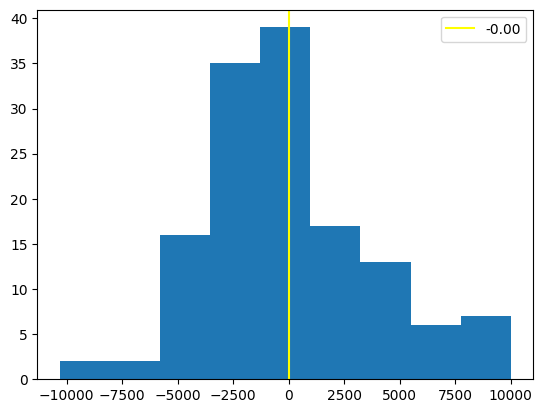

In [ ]:
# Residual Analysis
train_error= y_train- y_train_pred
plt.hist(train_error, bins='sturges')
plt.axvline(train_error.mean(),label=f'{train_error.mean():.2f}',color='yellow')
plt.legend()
plt.show()

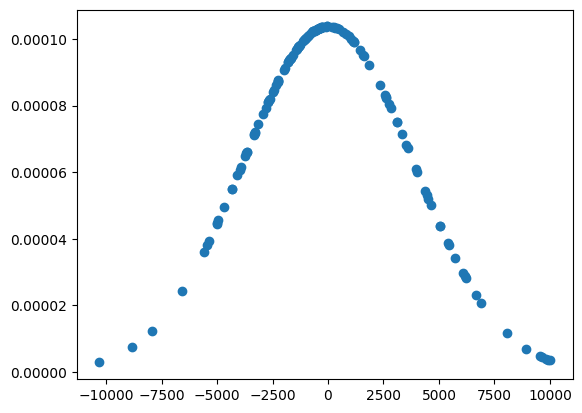

In [ ]:

d = norm.pdf(train_error,train_error.mean(),train_error.std())
plt.scatter(train_error,d)

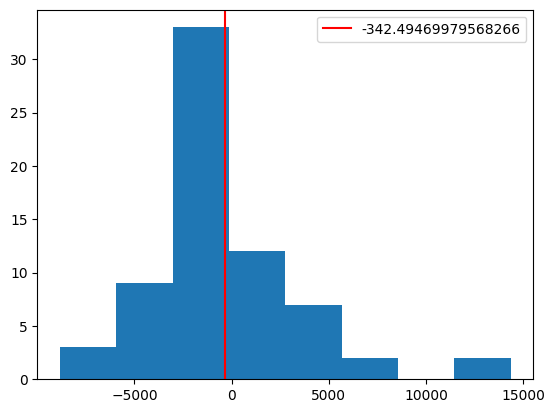

In [ ]:
test_error= y_test-y_test_pred
plt.hist(test_error,bins='sturges')
plt.axvline(test_error.mean(),label= f'{test_error.mean()}',color='red')
plt.legend()
plt.show()

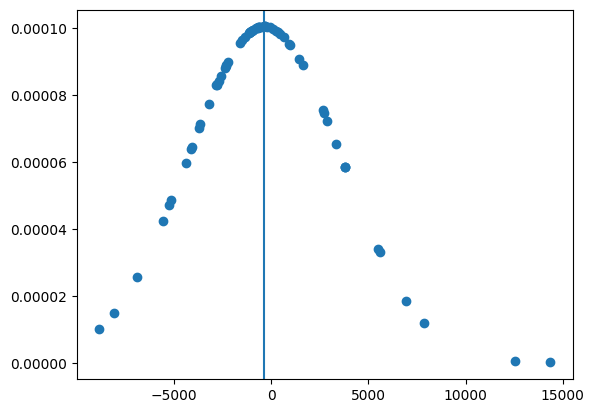

In [ ]:
d2= norm.pdf(test_error,test_error.mean(),test_error.std())
plt.scatter(test_error,d2)
plt.axvline(test_error.mean())
plt.show()

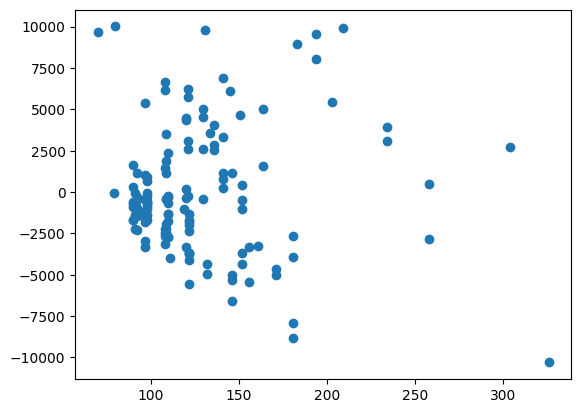

In [ ]:
plt.scatter(X_train,train_error)

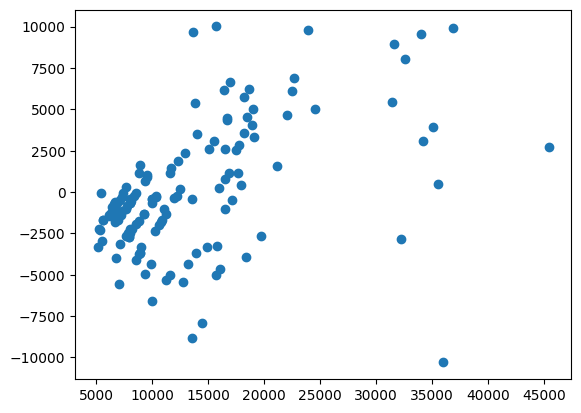

In [ ]:
plt.scatter(y_train,train_error)

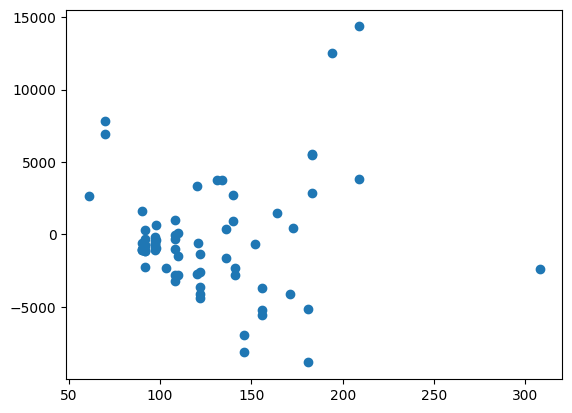

In [ ]:
plt.scatter(X_test,test_error)

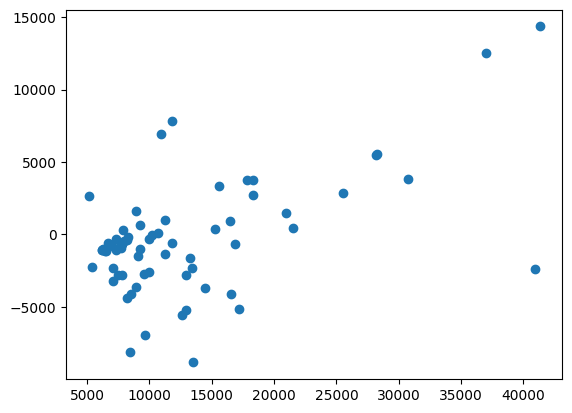

In [ ]:
plt.scatter(y_test,test_error)

In [ ]:

X= df_new.drop('price',axis=1)
y= df_new['price']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
177,-1,4,102.4,175.6,66.5,53.9,2458,4,122,3.31,...,0,0,0,0,0,0,0,1,0,0
75,1,2,102.7,178.4,68.0,54.8,2910,4,140,3.78,...,0,0,0,0,0,0,0,0,0,0
174,-1,4,102.4,175.6,66.5,54.9,2480,4,110,3.27,...,0,0,0,0,0,0,0,1,0,0
31,2,2,86.6,144.6,63.9,50.8,1819,4,92,2.91,...,0,0,0,0,0,0,0,0,0,0
12,0,2,101.2,176.8,64.8,54.3,2710,6,164,3.31,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   doornumber             205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   cylindernumber         205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   boreratio              205 non-null    float64
 10  stroke                 205 non-null    float64
 11  compressionratio       205 non-null    float64
 12  horsepower             205 non-null    int64  
 13  peakrpm                205 non-null    int64  
 14  citympg                205 non-null    int64  
 15  highwa

In [ ]:
ss= StandardScaler()
ss_values= ss.fit_transform(X_train[X_train.columns[:16]])
X_train[X_train.columns[:16]]= ss_values
X_train.head()


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
177,-1.5000,0.887412,0.573309,0.076413,0.235105,0.043859,-0.221382,-0.363079,-0.121429,-0.038909,...,0,0,0,0,0,0,0,1,0,0
75,0.1250,-1.126872,0.622875,0.302880,0.924984,0.408026,0.646950,-0.363079,0.314497,1.692945,...,0,0,0,0,0,0,0,0,0,0
174,-1.5000,0.887412,0.573309,0.076413,0.235105,0.448489,-0.179118,-0.363079,-0.412047,-0.186301,...,0,0,0,0,0,0,0,1,0,0
31,0.9375,-1.126872,-2.037199,-2.430901,-0.960684,-1.210497,-1.448956,-0.363079,-0.847973,-1.512828,...,0,0,0,0,0,0,0,0,0,0
12,-0.6875,-1.126872,0.375042,0.173470,-0.546757,0.205711,0.262732,1.396930,0.895732,-0.038909,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_sm= sm.add_constant(X_train)
model= sm.OLS(y_train,X_train_sm).fit()
model.params

const                    1.111326e+04
symboling               -2.583520e+02
doornumber               2.554028e+02
wheelbase                4.605784e+02
carlength               -6.252099e+02
carwidth                 1.483336e+03
carheight               -3.289250e+02
curbweight               2.130519e+03
cylindernumber          -8.448995e+02
enginesize               4.068721e+03
boreratio               -1.024074e+03
stroke                  -7.567151e+01
compressionratio         4.636386e+02
horsepower               2.553877e+02
peakrpm                  8.288722e+02
citympg                  6.368825e+02
highwaympg              -2.391232e+02
fueltype_gas             6.290680e+03
aspiration_turbo         2.528179e+03
carbody_hardtop         -2.337527e+02
carbody_hatchback       -3.517083e+03
carbody_sedan           -3.523827e+03
carbody_wagon           -4.154162e+03
drivewheel_fwd          -8.505823e+02
drivewheel_rwd          -1.393007e+03
enginelocation_rear      4.920851e+03
enginetype_d

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     67.51
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           3.52e-53
Time:                        11:38:21   Log-Likelihood:                -1214.5
No. Observations:                 143   AIC:                             2541.
Df Residuals:                      87   BIC:                             2707.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.111e+

In [ ]:

X_train_new= X_train[['enginesize','curbweight','horsepower','citympg']]
X_train_new_sm= sm.add_constant(X_train_new)
model_new= sm.OLS(y_train,X_train_new_sm)
vif_df= pd.DataFrame()
vif_df['Features']= X_train_new_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_new_sm.values, i) for i in range(X_train_new_sm.shape[1])]
vif_df

,Features,VIF
0,const,1.000000
1,enginesize,4.901158
2,curbweight,4.732600
3,horsepower,4.533126
4,citympg,3.942814


In [ ]:
X_train_eng= X_train_new.drop('enginesize',axis=1)
y_train_eng= X_train_new['enginesize']
X_train_eng_sm=sm.add_constant(X_train_eng)
model_eng=sm.OLS(y_train_eng,X_train_eng_sm).fit()
print(model_eng.summary())

                            OLS Regression Results                            
Dep. Variable:             enginesize   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     180.8
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           8.94e-48
Time:                        11:40:07   Log-Likelihood:                -89.261
No. Observations:                 143   AIC:                             186.5
Df Residuals:                     139   BIC:                             198.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.949e-17      0.038    7.7e-16      1.0

In [ ]:
print(f"VIF value for enginesize is {1/(1-0.8)}")

VIF value for enginesize is 5.000000000000001


In [ ]:
# VIF for all the features
vif_df= pd.DataFrame()
vif_df['Features']= X_train_sm.columns
vif_df['VIF']= [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_df

c:\Users\bhati\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\bhati\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\bhati\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Features,VIF
0,const,0.000000
1,symboling,7.083662
2,doornumber,4.732720
3,wheelbase,27.742502
4,carlength,28.311274
5,carwidth,15.679405
6,carheight,8.119666
7,curbweight,46.887888
8,cylindernumber,32.378272
9,enginesize,72.608025


In [ ]:
bse_symboling= model.bse['symboling']
t1= model.params['symboling']/bse_symboling
print(t1)

-0.7664492916550341


In [ ]:
# p-value for t-stat
print(f"p-value for t-stat for symboling {2* (1-norm.cdf(abs(t1)))}")


p-value for t-stat for symboling 0.4434090131014943


In [ ]:
# Check all the p_values
print(model.pvalues)

const                    0.000002
symboling                0.445484
doornumber               0.356501
wheelbase                0.491750
carlength                0.356087
carwidth                 0.003989
carheight                0.364582
curbweight               0.016007
cylindernumber           0.244234
enginesize               0.000297
boreratio                0.007926
stroke                   0.789116
compressionratio         0.782639
horsepower               0.758939
peakrpm                  0.012603
citympg                  0.456021
highwaympg               0.755790
fueltype_gas             0.014296
aspiration_turbo         0.002748
carbody_hardtop          0.889279
carbody_hatchback        0.002640
carbody_sedan            0.005734
carbody_wagon            0.003059
drivewheel_fwd           0.461885
drivewheel_rwd           0.296761
enginelocation_rear      0.010376
enginetype_dohcv         0.925901
enginetype_l             0.192379
enginetype_ohc           0.725297
enginetype_ohc

In [ ]:
new_df = pd.DataFrame()
new_df['feature']=X_train.columns
new_df['pValues'] = model.pvalues.values[1:]
new_df=new_df[new_df['pValues']<=0.05]
new_df

,feature,pValues
4,carwidth,0.003989
6,curbweight,0.016007
8,enginesize,0.000297
9,boreratio,0.007926
13,peakrpm,0.012603
16,fueltype_gas,0.014296
17,aspiration_turbo,0.002748
19,carbody_hatchback,0.002640
20,carbody_sedan,0.005734
21,carbody_wagon,0.003059


In [ ]:
#rebuild the Linear regression model
X_new= X[new_df.feature]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size = 0.33, random_state = 42)

X_train_sm2 = sm.add_constant(X_train2)
model2 = sm.OLS(y_train2, X_train_sm2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     132.8
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           3.34e-70
Time:                        11:41:23   Log-Likelihood:                -1206.6
No. Observations:                 137   AIC:                             2455.
Df Residuals:                     116   BIC:                             2516.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.285e+

In [ ]:
# Find the moderately too highly correlated features with price.
corr_df= df_new.corr()['price']
corr_data=corr_df[(corr_df >=0.5)| (corr_df<=-0.5)]
corr_features= list(corr_data.index)
corr_features.remove('price')
corr_features


['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi',
 'CarCompany_buick']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr=LinearRegression()
rfe1= RFE(lr,n_features_to_select=10)
rfe1.fit(X_train[corr_features],y_train)
print(corr_features)
print(rfe1.support_)
print(rfe1.ranking_)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'CarCompany_buick']
[False False  True False  True  True  True  True  True  True  True False
 False  True  True]
[5 3 1 4 1 1 1 1 1 1 1 6 2 1 1]


In [ ]:
# Look at the features selected.
rfe1_features= X_train[corr_features].columns[rfe1.support_]
rfe1_features

Index(['carwidth', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
       'citympg', 'highwaympg', 'drivewheel_fwd', 'fuelsystem_mpfi',
       'CarCompany_buick'],
      dtype='object')

In [ ]:
# Check for multicollinearity.
X_train_rfe1= X_train[rfe1_features]
X_train_rfe1_sm = sm.add_constant(X_train_rfe1)
lr = sm.OLS(y_train, X_train_rfe1_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     91.03
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           3.16e-54
Time:                        11:42:10   Log-Likelihood:                -1336.8
No. Observations:                 143   AIC:                             2696.
Df Residuals:                     132   BIC:                             2728.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.412e+04    618.029  

In [ ]:
vif=pd.DataFrame()
vif['Feature']= X_train_rfe1_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe1_sm.values,i) for i in range(X_train_rfe1_sm.shape[1])]
vif

,Feature,VIF
0,const,6.532107
1,carwidth,2.502449
2,cylindernumber,6.791186
3,enginesize,10.130751
4,boreratio,2.893638
5,horsepower,6.062996
6,citympg,19.898364
7,highwaympg,17.691014
8,drivewheel_fwd,2.136322
9,fuelsystem_mpfi,2.070927


In [ ]:
lr2=LinearRegression()
rfe2= RFE(lr2,n_features_to_select=5)
rfe2.fit(X_train[corr_features],y_train)
print(corr_features)
print(rfe2.support_)
print(rfe2.ranking_)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'CarCompany_buick']
[False False  True False False  True False  True False False  True False
 False False  True]
[10  8  1  9  3  1  4  1  6  5  1 11  7  2  1]


In [ ]:
rfe2_features= X_train[corr_features].columns[rfe2.support_]
rfe2_features


Index(['carwidth', 'enginesize', 'horsepower', 'drivewheel_fwd',
       'CarCompany_buick'],
      dtype='object')

In [ ]:
#check multicollinearity
X_train_rfe2= X_train[rfe2_features]
X_train_rfe2_sm= sm.add_constant(X_train_rfe2)
model3= sm.OLS(y_train,X_train_rfe2_sm).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.00e-58
Time:                        11:42:32   Log-Likelihood:                -1339.8
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     137   BIC:                             2709.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.436e+04    427.391  

In [ ]:
vif=pd.DataFrame()
vif['Feature']= X_train_rfe2_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2_sm.values,i) for i in range(X_train_rfe2_sm.shape[1])]
vif


,Feature,VIF
0,const,3.111405
1,carwidth,2.163310
2,enginesize,4.179816
3,horsepower,3.354700
4,drivewheel_fwd,1.492782
5,CarCompany_buick,1.464280


In [ ]:
X_train_final = X_train_rfe2_sm.drop(columns = "const")

model_final = LinearRegression()
model_final.fit(X_train_final,y_train)
y_train_pred = model_final.predict(X_train_final)

In [ ]:
print(r2_score(y_train,y_train_pred))
print(mean_squared_error(y_train,y_train_pred))
print(mean_absolute_error(y_train,y_train_pred))
print(mean_squared_log_error(y_train,y_train_pred))

0.868039301033769
8042954.083420408
2080.4939440769003
0.034309394595164494


In [ ]:
print(model_final.coef_)
print(model_final.intercept_)

[ 1690.28579989  2627.39761166  2355.55572572 -2016.68268397
  7984.87614403]
14355.67243492044


In [ ]:
# Evaluate the model further, perform residual analysis and check for Homoscedasticity.
train_errors= y_train- y_train_pred


In [ ]:
# Calculating the coefficients mathematically.

X_train_final.insert(loc=0,column='Ones',value=1)
x = np.matrix(X_train_final)
# Get the Z matrix.
x_t = np.matrix(X_train_final.T)
# Calculate the inverse of Z matrix.
z = np.matmul(x_t,x)
# Calculate the U matrix.
z_inv= np.linalg.inv(z)
# Calculate the values of betas.
y = np.matrix(y_train).reshape(-1,1)
u = np.matmul(x_t,y)

b = np.matmul(z_inv,u)
print(b)

[[14355.67243492]
 [ 1690.28579989]
 [ 2627.39761166]
 [ 2355.55572572]
 [-2016.68268397]
 [ 7984.87614403]]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
